<a href="https://colab.research.google.com/github/nayan136/Capstone-Project---Telecom-Churn-Analysis/blob/main/Telecom_Churn_Analysis_New_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

Details of the company and about dataset

**We will approach the problem by following the steps as mentioned below:**
1. <b>Understand the problem</b>. We'll look at each variable and do a philosophical analysis about their meaning and importance for this problem.
2. <b>Univariable study</b>. We'll just focus on the dependent variable ('Churn') and try to know a little bit more about it.
3. <b>Multivariate study</b>. We'll try to understand how the dependent variable and independent variables relate.
4. <b>Basic cleaning</b>. We'll clean the dataset and handle the missing data, outliers and categorical variables.
5. <b>Test assumptions</b>. We'll check if our data meets the assumptions required by most multivariate techniques.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# Mount your drive and read the csv file. Make sure you are using the correct file path
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading csv File
file_path = '/content/drive/MyDrive/AlmaBetter/Cohort Hardeol/Capstone Projects/Project 1/Telecom Churn.csv'
df=pd.read_csv(file_path)

In [ ]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

# 1. So... What can we expect?

In order to understand our data, we can look at each variable and try to understand their meaning and relevance to this problem. First we try to understand what each varible means - 

1.   **State** - 51 Unique States in United States of America (Categorical)
2.   **Account Length** - Length of The Account
3.   **Area Code** - 415 relates to San Francisco,408 is of San Jose and 510 is of City of Okland (Categorical)
4.   **International Plan** - Yes Indicate International Plan is Present and No Indicates no subscription for Internatinal Plan (Categorical)
5.   **Voice mail plan** - Yes Indicates Voice Mail Plan is Present and No Indicates no subscription for Voice Mail Plan (Categorical)
6.   **Number vmail messages** -  Number of Voice Mail Messages ranging from 0 to 50
7.   **Total day minutes** - Total Number of Minutes Spent By Customers in Morning
8.   **Total day calls** - Total Number of Calls made by Customer in Morning
9.   **Total day charge** - Total Charge to the Customers in Morning
10.  **Total eve minutes** - Total Number of Minutes Spent By Customers in Evening
11.  **Total eve calls** - Total Number of Calls made by Customer in Evening
12.  **Total eve charge** - Total Charge to the Customers in Evening
13.  **Total night minutes** - Total Number of Minutes Spent By Customers in the Night
14.  **Total night calls** - Total Number of Calls made by Customer in Night
15.  **Total night charge** - Total Charge to the Customers in Night
16.  **Total intl minutes** - Total Number of Minutes Spent By Customers on international calls
17.  **Total intl calls**- Total Number of international Calls made by Customer 
18.  **Total intl charge** - Total Charge to the Customers on international calls
19.  **Customer service calls** - Total numbers of calls to customer service
20.  **Churn** - True indicate that customer doesn't continue with the subscription and False indiacte customer continue with the subscription. (Categorical)

Here we will analyz the key factors that are responsible for customers leaving the subscription. We will analyze this for each variables and its dependecy to Churn variable.

# Data Exploration

First let us look at the data ...

In [ ]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
df.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

There area total 3333 rows and 20 variables. It seems that there is no missing data in the dataset.

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
State,3333,51,WV,106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Account length,3333.0,NaN,NaN,NaN,101.064806,39.822106,1.0,74.0,101.0,127.0,243.0
Area code,3333.0,NaN,NaN,NaN,437.182418,42.37129,408.0,408.0,415.0,510.0,510.0
International plan,3333,2,No,3010,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Voice mail plan,3333,2,No,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number vmail messages,3333.0,NaN,NaN,NaN,8.09901,13.688365,0.0,0.0,0.0,20.0,51.0
Total day minutes,3333.0,NaN,NaN,NaN,179.775098,54.467389,0.0,143.7,179.4,216.4,350.8
Total day calls,3333.0,NaN,NaN,NaN,100.435644,20.069084,0.0,87.0,101.0,114.0,165.0
Total day charge,3333.0,NaN,NaN,NaN,30.562307,9.259435,0.0,24.43,30.5,36.79,59.64
Total eve minutes,3333.0,NaN,NaN,NaN,200.980348,50.713844,0.0,166.6,201.4,235.3,363.7


In [ ]:
# check unique values of each column
unique_column_values = {}
for column in df.columns:
  value = {'column_name':column, 'frquency': len(df[column].unique())}
  unique_column_values[column] = value
pd.DataFrame(unique_column_values.values()).sort_values('frquency')

**After observing the data we will make few assumptions before proceeding further:**
1.  The dataset is taken for a particular date and all the data is for only one day. The customers who has left the subscription will never return.
2.  The dataset is a subset of whole USA dataset and it will respresent the whole USA population. Thus our conlusions are only for USA.

1.  From the data we can see that calltime is taken in minutes. From all 3 columns (Total day minutes, Total eve minutes & Total night minutes) the maximum talktime is 363 minutes (~6 hours). So we can assume that the dataset is taken on partcular date.
2.  The dataset has all 51 states of USA and all states have customers. So, it exapanded to whole USA. But there are only 3333 customers which is very small compared to whole USA population. Thus we can assume that the dataset is a part of whole USA dataset.

# Looking deep inside data

**Check corelation between columns -**

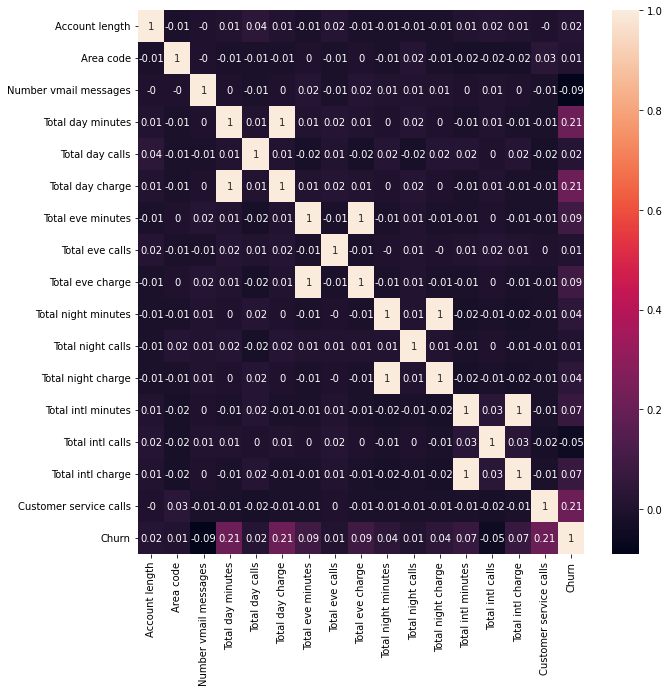

In [ ]:
corr=df.corr().round(2)
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot = True)

**we can see strong correlation between the variables:**

1. Total day minutes vs total day charge
2. Total eve minues vs total eve charge
3. Total night minutes vs total night charge
4. Total intl minutes vs total intl charge

Therefore we can choose any one variable from each pair for analyzing the churn.


In [ ]:
# drop columns
#df.drop(['Total day charge','Total eve charge','Total night charge','Total intl charge'],axis=1, inplace=True)

**First things first: analysing 'Churn'**

'Churn' is our depended variable. We will analyse churn to get some insight about it.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


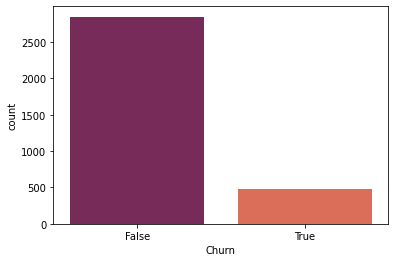

In [ ]:
sns.countplot(df['Churn'],palette='rocket')

We can observe that there are few customers leaving the subscription. Let's calculate the percentage of churn.

In [ ]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

In [ ]:
# calculate churn percentage
df_churn = pd.DataFrame(df['Churn'].value_counts())
df_churn.Churn[1]/(df_churn.Churn[0]+df_churn.Churn[1])*100

14.491449144914492

It can be seen that almost 14.5% of customers are leaving the subscription.

Since the data has 19 independent variables, it will take times to analyze each and every variables. So, we will find the correlation between Churn and other continuous variables and analyze those variables who has high correlation to Churn.

In [ ]:
df.corr()['Churn'][:-1].sort_values(ascending=False)

Customer service calls    0.208750
Total day minutes         0.205151
Total day charge          0.205151
Total eve minutes         0.092796
Total eve charge          0.092786
Total intl charge         0.068259
Total intl minutes        0.068239
Total night charge        0.035496
Total night minutes       0.035493
Total day calls           0.018459
Account length            0.016541
Total eve calls           0.009233
Area code                 0.006174
Total night calls         0.006141
Total intl calls         -0.052844
Number vmail messages    -0.089728
Name: Churn, dtype: float64

From the above we can seet that the variables **Customer service calls** and **Total day minutes (Total day charge)** are slightly related to **Churn**. As for the other columns the corelation is negligible.


Now let's check variable **Customer service calls**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


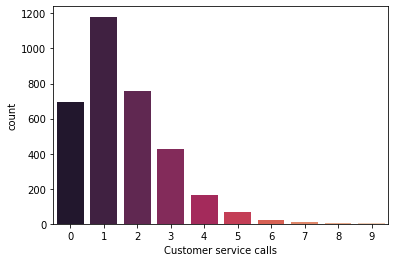

In [ ]:
# Frequency of Customer service calls
sns.countplot(df['Customer service calls'],palette='rocket')

Most Customers calls customer service only one time. There are less customers  who call customer service multiple times. 

In [ ]:
# calculating churn percentage by number of customer calls
# {'calls':0,'total_calls': 1, 'total_customers':2,'churn':1}
dict_service_calls = {}
def customer_service(row):
  calls = row['Customer service calls']
  if not dict_service_calls.get(calls,False):
    dict_service_calls[calls] = {'calls':calls,'total_customers':0,'churn':0}    

  dict_service_calls[calls]['total_customers'] += 1
  if row['Churn'] == True:
    dict_service_calls[calls]['churn'] += 1

df.apply(lambda x:customer_service(x), axis=1 )
df_service_calls = pd.DataFrame(dict_service_calls.values())
df_service_calls['churn_per'] = df_service_calls['churn']/(df_service_calls['total_customers'])*100
df_service_calls.sort_values('churn_per', ascending=False)

,calls,total_customers,churn,churn_per
7,9,2,2,100.000000
8,6,22,14,63.636364
5,5,66,40,60.606061
6,7,9,5,55.555556
9,8,2,1,50.000000
4,4,166,76,45.783133
1,0,697,92,13.199426
2,2,759,87,11.462451
0,1,1181,122,10.330229
3,3,429,44,10.256410


From the above data we observe the following - 

1.   The customers who have called more than 3 calls have a more than 45% chance of leaving the subscription.
2.   The customers who have called lesss than or equal to 3 calls have a maximum 13% change of leaving the subscription.

**So, we can conclude that churn rate increses with increse customer service calls**

Now let's check variable **Total day minutes**

In [ ]:
df['Total day minutes'].describe()

count    3333.000000
mean      179.775098
std        54.467389
min         0.000000
25%       143.700000
50%       179.400000
75%       216.400000
max       350.800000
Name: Total day minutes, dtype: float64

It can be seen that there are customers with 0 talkime and there are also customers who has spent 350 minutes on calls.

In [ ]:
df.groupby('Churn').agg({'Total day minutes':'mean'})

,Total day minutes
Churn,
False,175.175754
True,206.914079


The average talktime of non churn customers is 175.17 minutes and average talktime of churn customers is 206.91 minutes.

In [ ]:
# Histogram of Total day minutes breakdown by Churn
def plot_hist_y(x,y):
    plt.hist(list(x[y == 1]),color='green',label='True',bins='auto')
    plt.hist(list(x[y == 0]),color='grey', alpha = 0.7, label='False',bins='auto')
    plt.title("Histogram of Total day minutes breakdown by Churn")
    plt.xlabel("Total day minutes")
    plt.ylabel("Frequency")
    plt.legend(loc="upper right")
    plt.show()
plot_hist_y(df['Total day minutes'],df.Churn)

**From the above histogram plot, we can observe that customers who has longer talktime in the morning has a high chance of discountinue the subscription.**

# Looking into categorical varaibles

**Now we will look into the categorical varaibles:**

**1) State:**
      Let chck the top 5 highest and lowest states with customers


In [ ]:
# Top 5 State
df['State'].value_counts().head()

WV    106
MN     84
NY     83
AL     80
WI     78
Name: State, dtype: int64

In [ ]:
# Bottom 5 State
df['State'].value_counts().tail()

AK    52
LA    51
PA    45
IA    44
CA    34
Name: State, dtype: int64

In [ ]:
# state wise customers with churn percentage
state_wise_customers = pd.DataFrame(df['State'].value_counts()).reset_index().rename(columns={'index':'State','State':'Total Customers'}).set_index('State')

state_wise_churn = df[df['Churn'] == True].groupby('State').agg({'Churn':'count'})
frames = [state_wise_customers,state_wise_churn]
state_wise_customer_churn = pd.concat(frames, axis=1).reset_index()
state_wise_customer_churn['churn_percentage'] = state_wise_customer_churn.apply(lambda x:round(x['Churn']/x['Total Customers']*100,2), axis=1)
state_wise_customer_churn.sort_values('churn_percentage', ascending=False)

In [ ]:
# State wise churn percentage
plt.figure(figsize=(20,7))
plt.title("State wise churn percentage")
sns.barplot(x='State',y='churn_percentage',data=state_wise_customer_churn.sort_values('churn_percentage'))

It is clear that CA(California) nad NJ(New Jersey) has the highest chan percentage and HI(Hawaii) & Ak(Alaska) has the lowest chan percentage. It may be due to good network or lack of competition in HI & Ak compared to CA & NJ. Or may be because due to small number of data we get this output.

**2) Area:**

In [ ]:
df['Area code'].value_counts()

415    1655
510     840
408     838
Name: Area code, dtype: int64

There are 3 area codes available in the data. 415 has the highest customers and 408 has the lowest customers.

In [ ]:
area_wise_churn = df[['Area code','Churn']].value_counts().unstack()
area_wise_churn

Churn,False,True
Area code,,
408,716,122
415,1419,236
510,715,125


In [ ]:

area_wise_churn.plot(kind='bar')
plt.title('Area Wise Churn & Non Churn')

In [ ]:
area_wise_churn.columns

Index([False, True], dtype='object', name='Churn')

In [ ]:
# Calculate area wise churn percentage
area_wise_churn.reset_index(inplace=True)
area_wise_churn['churn_per'] = area_wise_churn[True]/(area_wise_churn[True]+area_wise_churn[False])*100
area_wise_churn

Churn,Area code,False,True,churn_per
0,408,716,122,14.558473
1,415,1419,236,14.259819
2,510,715,125,14.880952


**Since churn percentage is almost same in all the area codes, we can conclude that Churn rate is not dependent on  Area code.**

**3) International plan**

In [ ]:
df['International plan'].value_counts()

No     3010
Yes     323
Name: International plan, dtype: int64

Most of the customers has no international plan.

In [ ]:
international_plan = df[['International plan','Churn']].value_counts().unstack()
international_plan

Churn,False,True
International plan,,
No,2664,346
Yes,186,137


In [ ]:
international_plan.plot(kind='bar')
plt.title('Internaton Plan wise Churn & Non Churn')

In [ ]:
# churn rate for no international plan 
round(international_plan.iloc[0,1]/(international_plan.iloc[0,0]+international_plan.iloc[0,1])*100,2)

11.5

In [ ]:
# churn rate for international plan 
round(international_plan.iloc[1,1]/(international_plan.iloc[1,0]+international_plan.iloc[1,1])*100,2)

42.41

We can see that the customers who has international plan, there is high chance of leaving the subscription. It may be due to customers not happy with the international plan.So, why customers with international plan is leaving? Now let's try to compare the call charge for internation plan vs non international plan.


In [ ]:
#  Let's compare call per minute charge for morning vs call per minute charge for international charge.
#day_charge = (df['Total day minutes'] / df['Total day charge']).mean()
#day_charge

In [ ]:
#(df['Total intl minutes'] / df['Total intl charge']).mean()
#It can be seen that International call charge is lower than local call charge.

In [ ]:
international_plan_customers = df[df['International plan'] == 'Yes']
international_no_plan_customers = df[df['International plan'] == 'No']

In [ ]:
international_plan_charge = (international_plan_customers['Total intl minutes'] / international_plan_customers['Total intl charge']).mean()
international_plan_charge

3.7031833251827737

In [ ]:
international_no_plan_charge = (international_no_plan_customers['Total intl minutes'] / international_no_plan_customers['Total intl charge']).mean()
international_no_plan_charge

3.702906746708978

From the above analysis we can conclude that even if customer takes international plan the call charge is same as customers without internation plan. Thus customers did not get any benifit even after taking international plan. That may be the reason why there is a high chance of chun for customers with international plan.




Is customer with international plan who spent more time on internation calls has the highest chance of leaving or not?

Now, let's check the varaible Total intl minutes

In [ ]:
df[(df['International plan'] == 'Yes')]['Total intl minutes'].describe()

count    323.000000
mean      10.628173
std        2.697787
min        1.300000
25%        9.000000
50%       10.800000
75%       12.200000
max       20.000000
Name: Total intl minutes, dtype: float64

In [ ]:
df[(df['International plan'] == 'Yes') & (df['Total intl minutes'] >= 12) & (df['Churn'] == True)]['Total intl minutes'].count() / df[(df['International plan'] == 'Yes')  & (df['Total intl minutes'] >= 12) ]['Total intl minutes'].count()*100

70.96774193548387

In [ ]:
df[(df['International plan'] == 'Yes') & (df['Total intl minutes'] < 12) & (df['Churn'] == True)]['Total intl minutes'].count() / df[(df['International plan'] == 'Yes')  & (df['Total intl minutes'] < 12) ]['Total intl minutes'].count()*100

30.869565217391305

For the customers having International Plan those with longer talktime (>=12 min) have higher chance of leaving and those with less talktime have lower change of leaving the subscription.

**4) Voice mail plan**

In [ ]:
# Voice mail plan
df['Voice mail plan'].value_counts()

No     2411
Yes     922
Name: Voice mail plan, dtype: int64

Most of the customers have no voice mail plan.

In [ ]:
voice_plan_churn = df[['Voice mail plan','Churn']].value_counts().unstack()
voice_plan_churn

Churn,False,True
Voice mail plan,,
No,2008,403
Yes,842,80


Text(0.5, 1.0, 'Voice Mail Plan wise Churn & Non Churn')

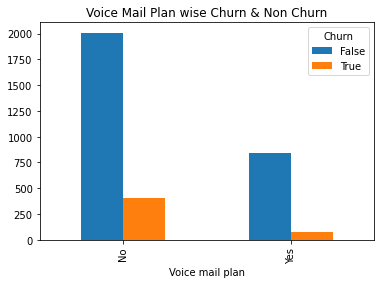

In [ ]:
voice_plan_churn.plot(kind='bar')
plt.title('Voice Mail Plan wise Churn & Non Churn')

In [ ]:
# churn rate for no voice mail plan 
voice_plan_churn.iloc[0,1]/(voice_plan_churn.iloc[0,0]+voice_plan_churn.iloc[0,1])*100

16.71505599336375

In [ ]:
# churn rate for voice mail plan 
voice_plan_churn.iloc[1,1]/(voice_plan_churn.iloc[1,0]+voice_plan_churn.iloc[1,1])*100

8.676789587852495

We can see that the customers who has no voice mail plan, there is some chance of leaving the subscription.

# Observation

**From the above observaton we can conclude that:**
1.  Churn rate increses with increse customer service calls.
2.  Customers who has longer talktime in the morning has a high chance of discountinue the subscription.
3.  High population area has high churn rate.
4.  Customers who has international plan, there is high chance of leaving the subscription. It increses even more for customers who has international plan and has longer international calls.
5.  Customers who has no voice mail plan, there is some chance of leaving the subscription.

# Conclusion